## Is your Joke a Dad joke ?

This will help us get tools so we can read other dad's dad jokes and analyse what is going on with them

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

okay so now we are reading the dad jokes , they seem to be funny , but whats common in them ?

In [4]:
df = pd.read_csv("/content/reddit_dadjokes.csv")

In [5]:
df.head()

,author,url,joke,score,date
0,VERBERD,https://old.reddit.com/r/dadjokes/comments/rvz...,"Doctor: ""So, you're telling me that you have a...",1,2022-01-04 17:16:02
1,MHSPres,https://old.reddit.com/r/dadjokes/comments/rvz...,A grizzly kept talking to me and annoyed me He...,1,2022-01-04 17:14:44
2,craftworldyt,https://old.reddit.com/r/dadjokes/comments/rvz...,I rubbed mayonnaise on my eyes Oh fuck oh shit...,1,2022-01-04 16:57:58
3,dynam0,https://old.reddit.com/r/dadjokes/comments/rvy...,What do you say to encourage an asteroid? Go l...,1,2022-01-04 16:41:01
4,aAsm321,https://old.reddit.com/r/dadjokes/comments/rvy...,They always ask me why my mood is always negat...,1,2022-01-04 16:39:49


WAIT What are these columns , remove them they are of now use and blocking my view

In [6]:
drop = ['author','url','date']
df.drop(drop,axis=1,inplace=True)

  Some cool stuff which will help in reading the jokes and sort them

In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def preprocess_and_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [10]:

df['preprocessed_jokes'] = df['joke'].apply(preprocess_and_lemmatize)

all_jokes = ' '.join([' '.join(joke) for joke in df['preprocessed_jokes']])

word_counts = Counter(all_jokes.split())

In [11]:

frequency_threshold = 5

frequent_words = [word for word, count in word_counts.items() if count >= frequency_threshold]

your dad joke should not be too short otherwise no one will hear it , it should not be too long otherwise no one will listen to it

In [24]:
def predict_dad_joke(joke):
    preprocessed_joke = preprocess_and_lemmatize(joke)

    high_frequency_count = 0
    low_frequency_count = 0


    for word in preprocessed_joke:
        if word in frequent_words:
            high_frequency_count += 1
        else:
            low_frequency_count += 1

    count_words = len(preprocessed_joke)

    if high_frequency_count > 3 and high_frequency_count > 0.5 * count_words:
        return "Dad Joke"
    else:
        return "Not a Dad Joke"

Now we have all the words and how frequently they come in a dad joke

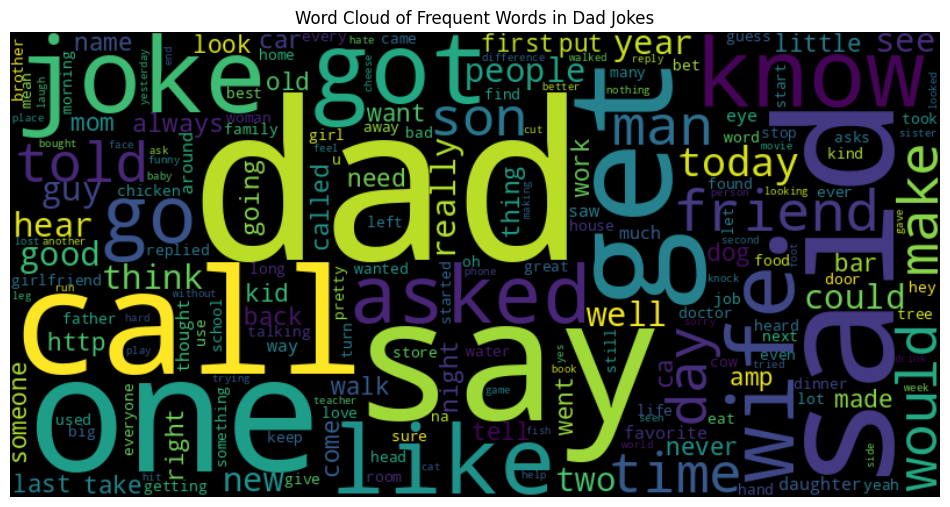

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

frequent_words = [word for word, count in word_counts.items() if count >= frequency_threshold]


wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words in Dad Jokes")
plt.show()

In [26]:
test_joke = "I ruined my laptop the winodws open "
result = predict_dad_joke(test_joke)
print(f"The joke: '{test_joke}' is classified as: {result}")

The joke: 'I ruined my laptop the winodws open ' is classified as: Not a Dad Joke
